In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [5]:
df = pd.read_csv('Ice_cream-selling-data.csv')

In [6]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [8]:
df.rename(columns={'Temperature (°C)': 'Temp', 'Ice Cream Sales (units)': 'Sales'}, inplace=True)
df.head()

,Temp,Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


Text(0, 0.5, 'Sales')

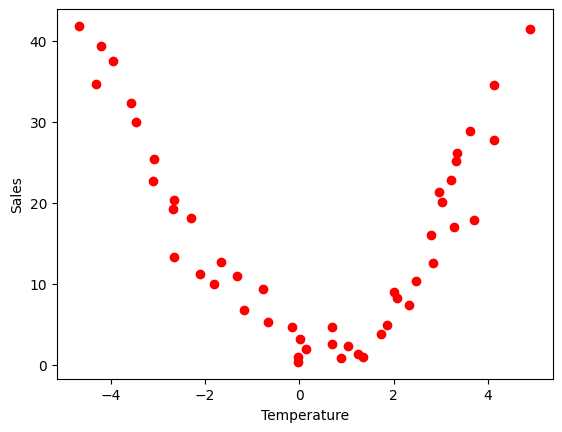

In [23]:
plt.scatter(df['Temp'], df['Sales'],color='r',marker='o')
plt.xlabel('Temperature')
plt.ylabel('Sales')

In [11]:
df.describe()

,Temp,Sales
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [20]:
### outliers # but we not remove them
q1 = np.percentile(df, 25)
q3 = np.percentile(df, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (df < lower_bound) | (df > upper_bound)
outliers = pd.DataFrame(outliers).sum()
outliers

Temp     0
Sales    7
dtype: int64

In [ ]:
## quadratic equation used - = y==0.5^2+1.5x+2+outliers

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['Temp'],df['Sales'],test_size=0.2,random_state=42)

In [26]:
## simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
accuracy = model.score(X_test.values.reshape(-1,1),y_test)
print(f'MSE: {mse}\nMAE: {mae}\nR2: {r2}\nAccuracy: {accuracy*100}%')

MSE: 149.32629119325185
MAE: 11.752026695440602
R2: -0.5751270190188227
Accuracy: -57.51270190188227%


<Axes: xlabel='Temp', ylabel='Sales'>

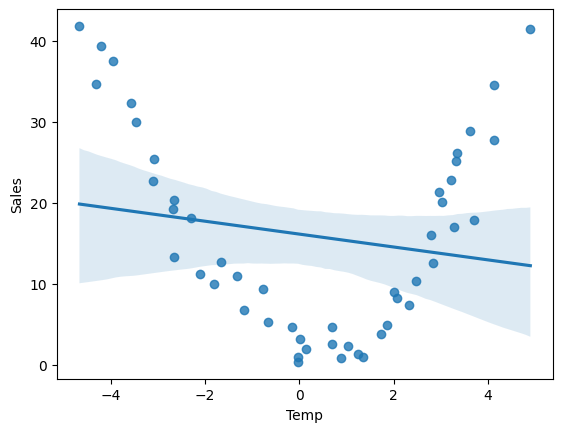

In [31]:
sns.regplot(x='Temp',y='Sales',data=df)

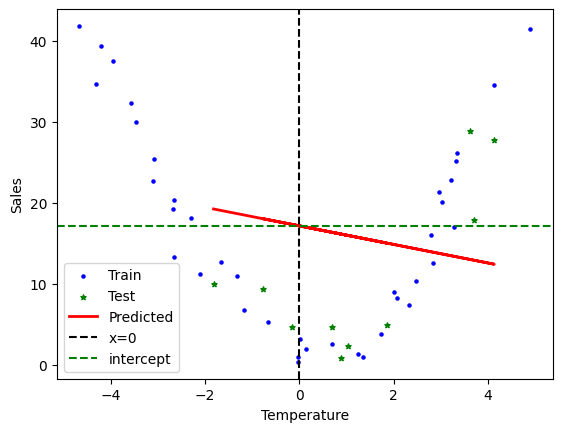

In [51]:
plt.scatter(X_train,y_train,color='b',marker='o',s=5,label='Train')
plt.scatter(X_test,y_test,color='green',marker='*',s=15,label='Test')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Predicted')
plt.axvline(x=0, color='black', linestyle='--',label='x=0')
plt.axhline(y=model.intercept_, color='g', linestyle='--',label='intercept')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.legend()

In [53]:
## polinomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)

In [56]:
X_train_poly = poly.fit_transform(X_train.values.reshape(-1,1))
X_test_poly = poly.transform(X_test.values.reshape(-1,1))
X_test_poly, X_train_poly   

(array([[ 1.        , -1.81893761,  3.30853403],
        [ 1.        ,  3.70405744, 13.72004151],
        [ 1.        ,  4.13353379, 17.08610158],
        [ 1.        ,  3.61077848, 13.03772121],
        [ 1.        , -0.77333004,  0.59803936],
        [ 1.        ,  1.02418081,  1.04894634],
        [ 1.        ,  0.87490503,  0.76545881],
        [ 1.        ,  0.69359887,  0.4810794 ],
        [ 1.        ,  1.85055193,  3.42454243],
        [ 1.        , -0.14963487,  0.02239059]]),
 array([[ 1.00000000e+00, -2.11186969e+00,  4.45999359e+00],
        [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01],
        [ 1.00000000e+00,  2.31859124e+00,  5.37586534e+00],
        [ 1.00000000e+00, -2.67246083e+00,  7.14204687e+00],
        [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01],
        [ 1.00000000e+00, -3.10844012e+00,  9.66239999e+00],
        [ 1.00000000e+00,  3.21136614e+00,  1.03128725e+01],
        [ 1.00000000e+00,  3.27004407e+00,  1.06931882e+01],
        [ 1.00000000

In [55]:
poly_model = LinearRegression()

In [57]:
poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = poly_model.predict(X_test_poly)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
accuracy = poly_model.score(X_test_poly,y_test)
print(f'MSE: {mse}\nMAE: {mae}\nR2: {r2}\nAccuracy: {accuracy*100}%')

MSE: 14.878796440981484
MAE: 3.2299819836597274
R2: 0.843055137193884
Accuracy: 84.3055137193884%
